<a href="https://colab.research.google.com/github/Abrazacs/python_-for-_analysis/blob/main/%D0%AD%D0%BA%D0%B7%D0%B0%D0%BC%D0%B5%D0%BD%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B8%D1%82%D0%BE%D0%BD_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

**Задание 1:**

Работа с массивами NumPy

Цель:

Проверить знание методов NumPy для анализа данных.

Задание:

Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].
Найдите:
Среднее арифметическое массива.
Медиану.
Стандартное отклонение.
Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

In [36]:
arr = np.random.randint(10, 101, size=50)

print(f"Исходный массив: {arr}")

mean = np.mean(arr)
median = np.median(arr)
std = np.std(arr)

print(f"Среднее арифметическое: {mean}")
print(f"Медиана: {median}")
print(f"Стандартное отклонение: {std}")

new_arr = arr / 3
filtered_arr = new_arr[new_arr % 1 == 0]

print(f"Новый массив: {new_arr}")
print(f"Отфильтрованный массив: {filtered_arr}")

Исходный массив: [25 54 36 39 92 28 72 17 72 23 87 91 44 94 73 60 93 54 94 82 19 79 17 45
 45 12 31 25 20 84 35 41 34 36 28 76 99 48 87 75 78 86 36 25 97 44 46 25
 46 17]
Среднее арифметическое: 53.32
Медиана: 45.5
Стандартное отклонение: 27.038076854687723
Новый массив: [ 8.33333333 18.         12.         13.         30.66666667  9.33333333
 24.          5.66666667 24.          7.66666667 29.         30.33333333
 14.66666667 31.33333333 24.33333333 20.         31.         18.
 31.33333333 27.33333333  6.33333333 26.33333333  5.66666667 15.
 15.          4.         10.33333333  8.33333333  6.66666667 28.
 11.66666667 13.66666667 11.33333333 12.          9.33333333 25.33333333
 33.         16.         29.         25.         26.         28.66666667
 12.          8.33333333 32.33333333 14.66666667 15.33333333  8.33333333
 15.33333333  5.66666667]
Отфильтрованный массив: [18. 12. 13. 24. 24. 29. 20. 31. 18. 15. 15.  4. 28. 12. 33. 16. 29. 25.
 26. 12.]


**Задание 2:**

Анализ данных с помощью Pandas
Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

date (дата продаж),
region (регион),
product (продукт),
sales (объем продаж).
Задание:

Загрузите данные из файла.
Определите:

1. Общее количество записей.
2. Какие регионы и продукты присутствуют в данных.

Подсчитайте:

3. Общие продажи по регионам.
4. Средний объем продаж для каждого продукта.
5. Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

In [9]:
df = pd.read_csv('sales_data_large.csv', sep = ',')
print(f"Общее количество записей: {df.shape[0]}")
print(f"Уникальные продукты: {df['product'].unique()}")
print(f"Уникальные регионы: {df['region'].unique()}")

Общее количество записей: 500
Уникальные продукты: ['Widget C' 'Widget B' 'Widget A']
Уникальные регионы: ['West' 'South' 'East' 'North']


In [14]:
sales_by_region = df.groupby('region')['sales'].sum()
print(f"Продажи по регионам:\n{sales_by_region}")

Продажи по регионам:
region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64


In [15]:
average_sales_by_product = df.groupby('product')['sales'].mean()
print(f"Средние продажи по продуктам:\n{average_sales_by_product}")

Средние продажи по продуктам:
product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64


In [16]:
pivot_table = pd.pivot_table(df, values='sales', index='region', columns='product', aggfunc='mean')
print(f"Сводная таблица средних продаж по регионам и продуктам:\n{pivot_table}")

Сводная таблица средних продаж по регионам и продуктам:
product    Widget A    Widget B    Widget C
region                                     
East     291.464286  263.116279  271.361111
North    289.145833  238.477273  304.660000
South    277.380952  282.833333  263.722222
West     250.106383  291.550000  267.136364


**Задание 3:**

Очистка данных и визуализация

Цель:

Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:

date (дата продаж),
sales (объем продаж),
region (регион).
Задание:

Найдите и устраните ошибки в данных:
1. Заполните пропущенные даты.
2. Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
3. Заполните пропущенные значения в sales средним значением.
4. Постройте график продаж по датам. Убедитесь, что даты упорядочены.

In [19]:
df_cleaning = pd.read_csv('sales_cleaning_large.csv', sep = ',')
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


Преобразуем дату в соотвествующий формат

In [24]:
df_cleaning['date'] = pd.to_datetime(df_cleaning['date'])

Заполним пропуски дат модой по колонке date

In [27]:
most_frequent_date = df_cleaning['date'].mode()[0]
df_cleaning['date'].fillna(most_frequent_date, inplace=True)

Определяем медиану по столбцу salse без учета отрицательных значений и заменяем отрицательные значения полученной медианой

In [26]:
median_sales = df_cleaning[df_cleaning['sales'] >= 0]['sales'].median()
df_cleaning.loc[df_cleaning['sales'] < 0, 'sales'] = median_sales

Высчитываем среднее значение по колонке salse и заполняем им пропуски в этой колонке.

In [29]:
mean_sales = df_cleaning['sales'].mean()
df_cleaning['sales'].fillna(mean_sales, inplace=True)

<ipython-input-29-5f2352b4fa2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaning['sales'].fillna(mean_sales, inplace=True)


Формируем данные для графика - суммируем объем продаж на конкретную дату и сортируем полученные данные в порядке возрастания дат. После чего формируем график.
В виду того, что пропуски даты мы запомнили модой, то мы видим существенный всплеск 13.12.2024

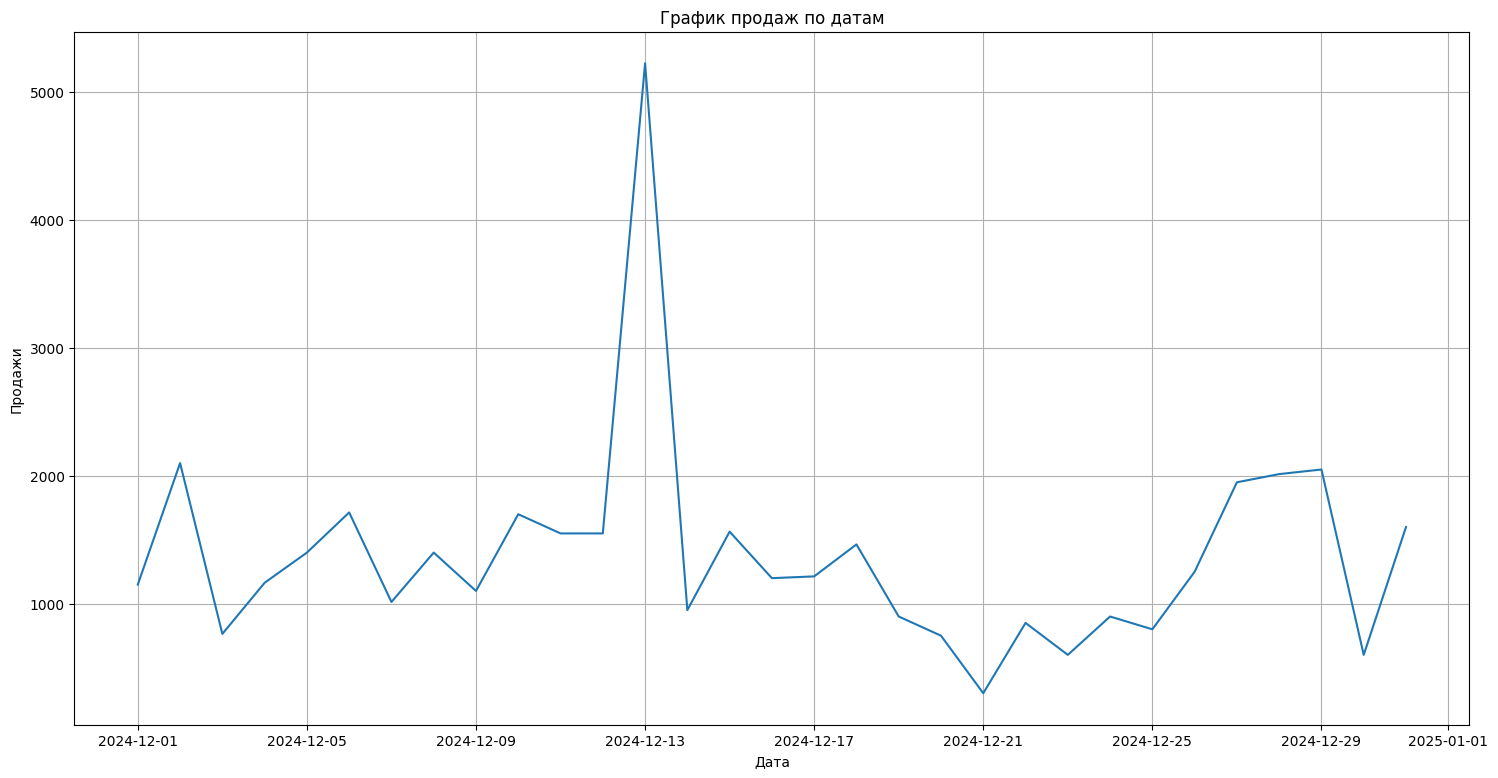

In [34]:
sales_by_date = df_cleaning.groupby('date')['sales'].sum().reset_index()
sales_by_date = sales_by_date.sort_values(by='date')
plt.figure(figsize=(18, 9))
plt.plot(sales_by_date['date'], sales_by_date['sales'])
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('График продаж по датам')
plt.grid(True)
plt.show()

**Задание 4:**

Получение данных из API

Цель:

Проверить способность работать с веб-данными.

Задание:

Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.
Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

In [46]:
response = requests.get('https://jsonplaceholder.typicode.com/users')
data = response.json()
df = pd.DataFrame(data)
users_df = df[['id', 'name', 'email']].copy()
users_df.loc[:, 'company_name'] = df['company'].apply(lambda x: x['name'])
filtered_users = users_df[users_df['company_name'].str.contains("Group")]
print(filtered_users)

   id                      name                   email     company_name
6   7           Kurtis Weissnat  Telly.Hoeger@billy.biz      Johns Group
7   8  Nicholas Runolfsdottir V    Sherwood@rosamond.me  Abernathy Group
